In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Checking the top five values in the dataset.

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking the bottom five values of dataset

In [6]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
#Checking for the missing values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#Getting information about the data columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


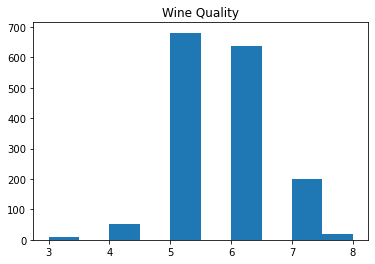

In [9]:
#Checking the distribution of the target column.

df['quality'].hist(grid=False)
plt.title('Wine Quality')
plt.show()

The above graph states that the column is not balanced.

In [10]:
#Getting the unique values of the target column.

df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
#Checking the number of values of the different wine quality.

from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

# Data Visualization

Plotting the dataset to see how the data columns are distributed in the provided dataset.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

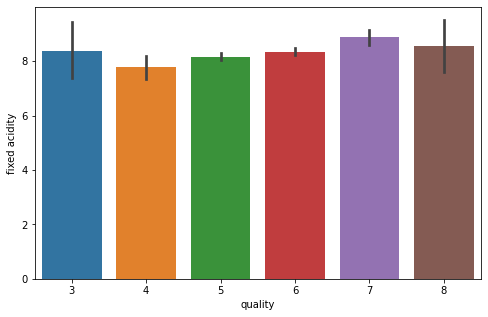

In [12]:
#Plotting Fixed acidity Vs wine quality

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

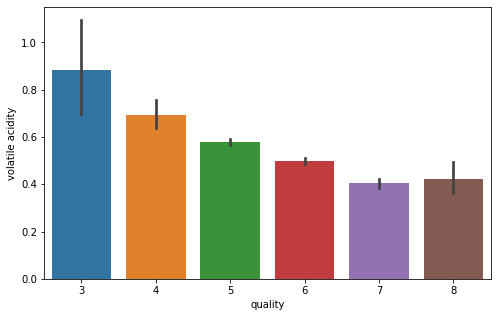

In [13]:
#Plotting volatile acidity Vs Wine quality

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

The above plot shows that as the volatile acidity is decreasing the wine quality is increasing.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

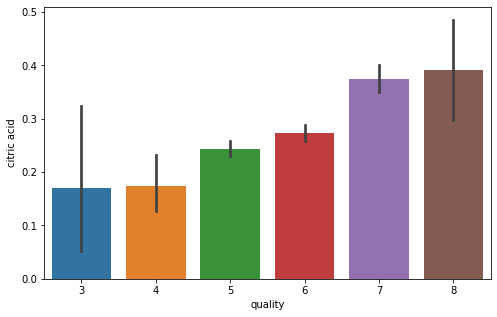

In [14]:
#Plotting citric acid Vs wine quality

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

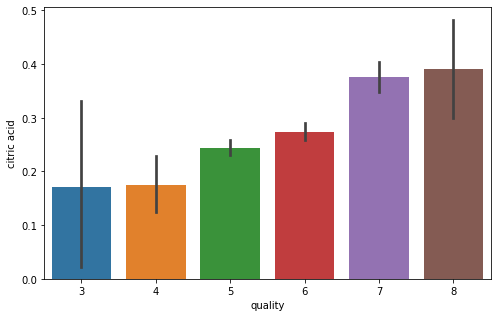

In [15]:
#Plotting citric acid Vs wine quality

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='citric acid', data = df)

The above graph shows that as the citric acid is increasing the wine quality is also increasing.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

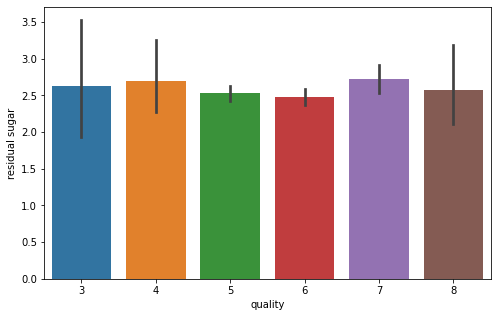

In [16]:
#Plotting residual sugar Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='residual sugar', data=df)

Residual sugar is also not giving and specification to classify the wine quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

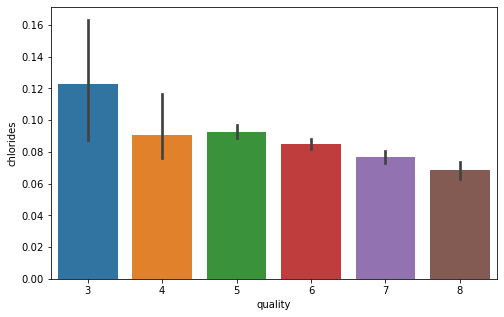

In [17]:
#Plotting chlorides Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='chlorides', data=df)

The above graph shows the composition of chlorides goes down as the quality of the wine is increasing.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

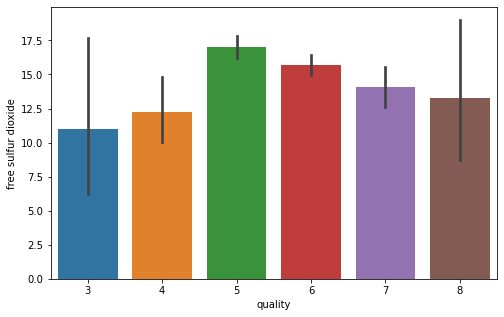

In [18]:
#Plotting free sulfur dioxide Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

This graph is also not helping us in wine quality classification

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

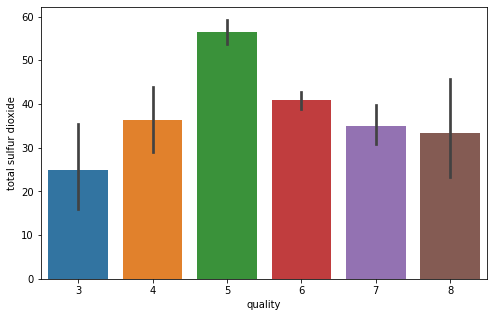

In [19]:
#Plotting total sulfur dioxide Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

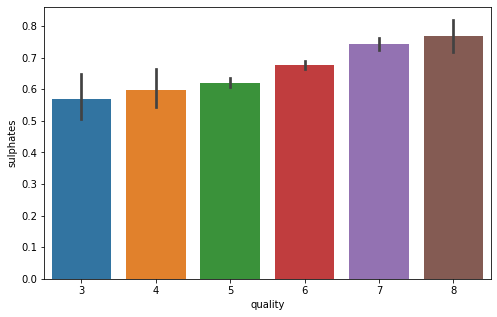

In [20]:
#Plotting sulphates Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='sulphates', data=df)

The above graph shows that as the value of sulphates is increasing the wine quality is also increasing.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

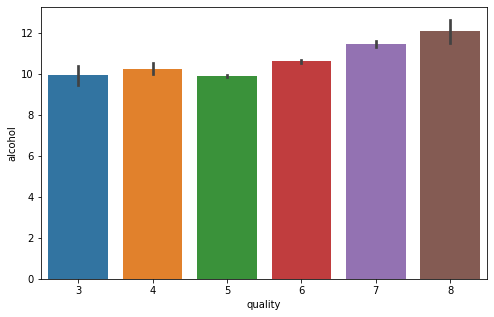

In [21]:
#Plotting alcohol Vs wine quality graph

fig_plot = plt.figure(figsize=[8,5])
sns.barplot(x='quality', y='alcohol', data=df)

The quality of the wine is increasing as the alcohol level is increasing

# Describing the dataset

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


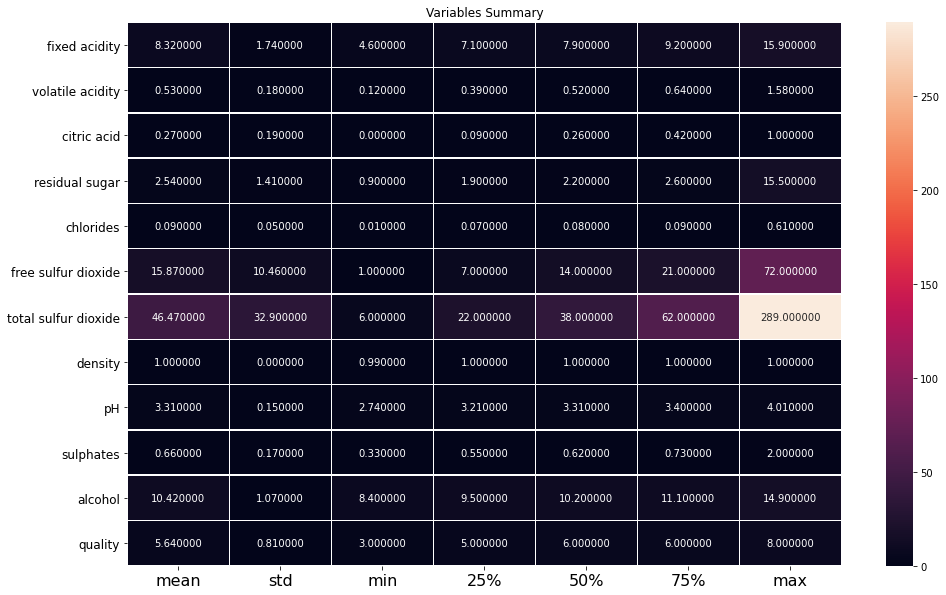

In [23]:
#Plotting heatmap for the describe

plt.figure(figsize=[16,10])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Variables Summary')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

Outcome of describe dataset:
We're determining mean, standard deviation, minimum and maximum value of each column.

Total Number of rows in the dataset:

1599 rows.
12 columns.
Fixed acid:

Mean = 8.32
Std. = 1.74
max_value = 15.90
min_value = 4.60
Volatile acidity:

Mean = 0.53
Std. = 0.18
max_value = 1.58
min_value = 0.12
Citric acid:

Mean = 0.27
Std. = 0.19
max_value = 1
min_value = 0
Residual sugar

Mean = 2.54
Std. = 1.41
max_value = 15.50
min_value = 0.90
Chlorides

Mean = 0.09
Std. = 0.05
max_value = 00.61
min_value = 0.01
Fixed sulfur dioxide:

Mean = 15.87
Std. = 10.46
max_value = 72
min_value = 1
Total Sulfur dioxide:

Mean = 46.47
Std. = 32.90
max_value = 289
min_value = 6
Density:

Mean = 1
Std. = 0
max_value = 1
min_value = 0.99
pH

Mean = 3.31
Std. = 0.15
max_value = 4.01
min_value = 2.74
Sulphates:

Mean = 0.66
Std. = 0.17
max_value = 2
min_value = 0.33
Alcohol:

Mean = 10.42
Std. = 1.07
Max_value = 14.90
Min_value = 8.40

# Checking the Correlation

In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Correlation using heatmap

<AxesSubplot:>

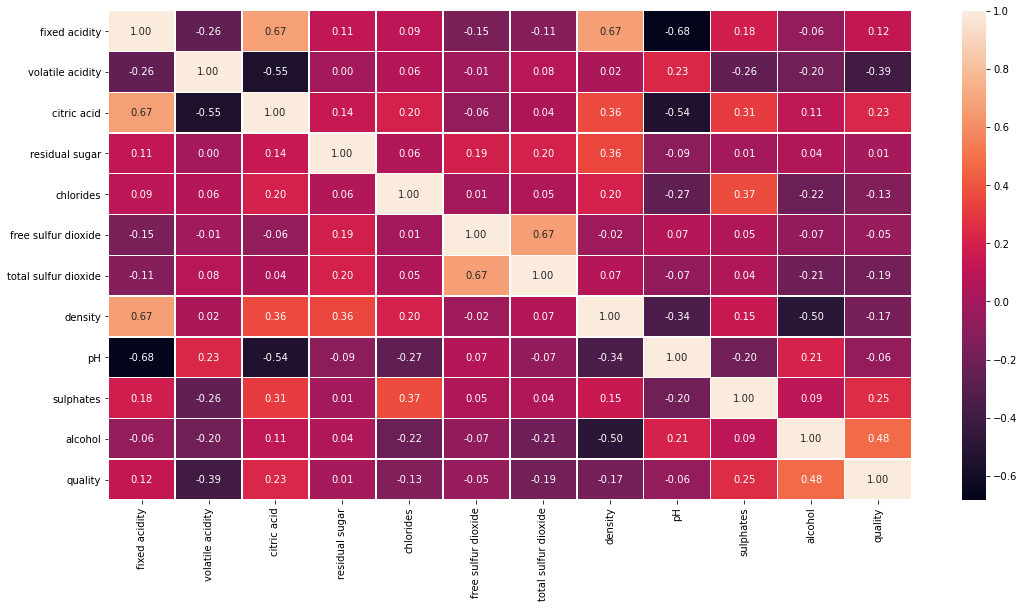

In [25]:
plt.figure(figsize=[18,9])
sns.heatmap(df.corr(), annot=True, linewidths=0.45, linecolor='white', fmt='0.2f')

In [26]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Outcome of the Correlation Table:

Fixed acidity has 12% correlation with the target column which can be considered as good bond. Volatile acidity has -39% correlation with the target column which can be considered as very weak bond. Citric acid has 23% correlation with the target column which can be considered as good bond. Residual sugar has 1% correlation with the target column which can be considered as weak bond. Chlorides has -13%, free sulfur dioxide has -5%, total sulfur dioxide has -19%, density has -17% and pH has -6% correlation with the target column which can be considered as very weak bond. Sulphates has 25% correlation with the target column which can be considered as good bond. Alcohol has 48% correlation with the target column which can be considered as strong bond.

Maximum Correlation is with the 'alcohol' column (0.48)

Minimum Correlation is with the 'volatile acidity' column (-0.39)

# Outliers Checking:

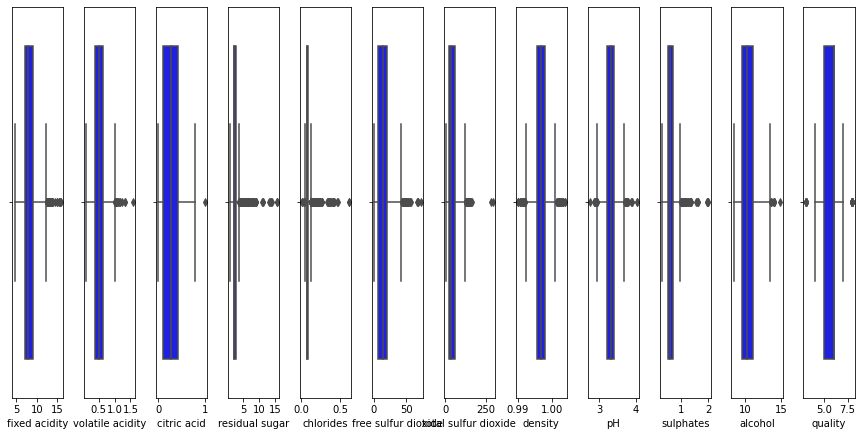

In [27]:
column_list = df.columns.values
n_col = 60
n_rows = 30
plt.figure(figsize=(n_col,3*n_col))
for i in range (0, len(column_list)):
    plt.subplot(n_rows, n_col, i+1)
    sns.boxplot(df[column_list[i]], color = 'blue', orient='V')
    plt.tight_layout()

We can observe that all the columns contain outliers including the target column.

Citric acid, alcohol and quality have less outliers.

All other columns have more outliers

In [28]:
#Making binary classification of the wine quality.

#(quality>7) considered as Good/1 and (quality<7) considered as Bad/0

wine_quality = []

for w in df['quality']:
    if w>=7:
        wine_quality.append('1')
    else:
        wine_quality.append('0')
        
df['quality'] = pd.DataFrame(wine_quality)

In [29]:
Counter (df['quality'])

Counter({'0': 1382, '1': 217})

# Checking for Skewnwess in the dataset.

In [30]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [31]:
#Splitting the independent and target variables in 'x' and 'y'

x = df.drop('quality', axis=1)
y = df['quality']

In [32]:
#Now checking the skewness in the 'x'

x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

# Data Cleaning:

We're using power_transform function to remove the skewness from the dataset.

In [33]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

In [34]:
df_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

Now, we can see that the skewness is removed from the dataset.

# Handling Class imbalance problem by oversampling the minority class

In [35]:
pip install --user imbalanced-learn  

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [38]:
y_over.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

# Scaling the data.

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

Finding best random_state

In [40]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print ('Best Accuracy is ', maxAccu, " on Random_State ", maxRS)

Best Accuracy is  0.8509406657018813  on Random_State  20


# Creating train test split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state= maxRS)

In [42]:
LR.fit(x_train, y_train)
predr = LR.predict(x_test)
print(accuracy_score(y_test, predr))
print(confusion_matrix(y_test, predr))
print(classification_report(y_test, predr))

0.8509406657018813
[[300  53]
 [ 50 288]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       353
           1       0.84      0.85      0.85       338

    accuracy                           0.85       691
   macro avg       0.85      0.85      0.85       691
weighted avg       0.85      0.85      0.85       691



Using Logistic Regression method we're getting 85% accuracy.

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print (accuracy_score(y_test, preddt))
print (confusion_matrix(y_test, preddt))
print (classification_report(y_test, preddt))

0.9044862518089725
[[317  36]
 [ 30 308]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       353
           1       0.90      0.91      0.90       338

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691



In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)
print (accuracy_score(y_test, predrf))
print (confusion_matrix(y_test, predrf))
print (classification_report(y_test, predrf))

0.959479015918958
[[333  20]
 [  8 330]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       353
           1       0.94      0.98      0.96       338

    accuracy                           0.96       691
   macro avg       0.96      0.96      0.96       691
weighted avg       0.96      0.96      0.96       691



From Random forest classifier we're getting 94% accuracy

In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

predsc = svc.predict(x_test)
print(accuracy_score(y_test, predsc))
print(confusion_matrix(y_test, predsc))
print (classification_report(y_test, predsc))

0.7279305354558611
[[229 124]
 [ 64 274]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       353
           1       0.69      0.81      0.74       338

    accuracy                           0.73       691
   macro avg       0.74      0.73      0.73       691
weighted avg       0.74      0.73      0.73       691



Using SVC, we're getting 73% accuracy.

- We're getting highest accuracy from RandomForestClassifier (94%).

Let's check for the cross validation scores.

In [46]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv =5)
print(' Cross calidation score for LogisticRegression is :', scr.mean())

 Cross calidation score for LogisticRegression is : 0.8674275078369906


In [47]:
scr = cross_val_score(dt, x, y, cv=5)
print('Cross validation score for DecisionTreeClassifier is :', scr.mean())

Cross validation score for DecisionTreeClassifier is : 0.799251567398119


In [48]:
scr = cross_val_score(RF, x, y, cv=5)
print('Cross validation score for RandomForestClassifier is :', scr.mean())

Cross validation score for RandomForestClassifier is : 0.8705446708463951


In [49]:
scr = cross_val_score(svc, x, y, cv=5)
print('Cross validation score for SVC is :', scr.mean())

Cross validation score for SVC is : 0.8692927115987461


# Deciding the best model:
    
Minimum difference for model accuracy and cross validation score is for LogisticRegression (-1.51). So, the best model is LogisticRegression.

Model Saving:

In [50]:
import pickle
filename= 'Red_wine_quality_prediction.pkl'
pickle.dump(LR, open(filename,'wb'))

Conclusion:

In [51]:
a = np.array(y_test)
predicted = np.array(LR.predict(x_test))
df_con = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_con

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
686,0,0
687,0,0
688,1,1
689,0,0
